In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from enum import Enum
import itertools
from datetime import datetime

dataset_dir = "../DataSet_CSVs/BikeDatasets/"

# shared CSV Link: https://docs.google.com/spreadsheets/d/1R4jSAZRnY51854B2PE-Y8L8G4KaLXcE4yR4zDtp-1Tg/edit?usp=sharing

In [2]:
# Import the dataset
bike_df = pd.read_csv(dataset_dir + "final_bike_dataset.csv")
bike_df.head()

C:\Users\albre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804.0,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256.0,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419.0,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [3]:
# Get all the column headers out of the datasheet to a csv
category_list = ["rideable_type", "start_station_name", "end_station_name", "member_casual"]
col_info_list = [[str(col_new), str(bike_df[col_new].dtype), str(bike_df[col_new].isna().sum()), str(len(bike_df[col_new].unique())), str(len(bike_df[col_new].unique()) == len(bike_df[col_new]))] for col_new in bike_df.columns]
with open(dataset_dir + "columns.csv", "w") as colfile:
    [colfile.write(",".join([col, col_dtype, count_sum, count_unique])+"\n") for col, col_dtype, count_sum, count_unique, count_is_unique in col_info_list]

In [4]:
# Print out the head of the dataset
bike_df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804.0,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256.0,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419.0,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [5]:
# Print out the dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463543 entries, 0 to 4463542
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 476.8+ MB


In [6]:
# Describe the df
bike_df.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng
count,4.463543e+06,4.463533e+06,4.463533e+06,4.452531e+06,4.452531e+06
mean,1.182327e+05,3.890377e+01,-7.703231e+01,3.890275e+01,-7.703193e+01
std,7.733241e+04,2.853396e-02,3.383902e-02,3.846085e-02,6.162854e-02
min,0.000000e+00,3.878000e+01,-7.739000e+01,0.000000e+00,-7.756000e+01
25%,5.313700e+04,3.889050e+01,-7.704564e+01,3.889046e+01,-7.704564e+01
50%,1.082420e+05,3.890283e+01,-7.703201e+01,3.890240e+01,-7.703189e+01
75%,1.756410e+05,3.891550e+01,-7.701392e+01,3.891305e+01,-7.701392e+01
max,3.282990e+05,3.913000e+01,-7.682000e+01,3.946000e+01,0.000000e+00


In [7]:
# Drop out the Ride ID
bike_df.drop(["ride_id", "end_station_id"], axis=1, inplace=True)

In [8]:
# Copy off the original df for any future use with the Null values.
copy_bike_df = bike_df.copy()

In [9]:
# Drop the null columns for initial analyses
bike_df.dropna(axis=0, inplace=True)

In [10]:
# Verify the new structure of the data.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030673 entries, 0 to 4463542
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   start_lat           float64
 8   start_lng           float64
 9   end_lat             float64
 10  end_lng             float64
 11  member_casual       object 
dtypes: float64(4), int64(1), object(7)
memory usage: 399.8+ MB


In [11]:
# The elapsed time on the bike
bike_df["started_at"] = pd.to_datetime(bike_df["started_at"])
bike_df["ended_at"] = pd.to_datetime(bike_df["ended_at"])
bike_df["elapsed_time"] = [((end) - (start)) for start, end in list(zip(bike_df["started_at"], bike_df["ended_at"]))]

In [12]:
# Parse out the date time stamps into separate columns
class dateenum(str, Enum):
    year="year"
    month="month"
    week="week"
    day="day"
    hour="hour"
    day_of_week="dow"
    
# Storage lists to parse out to columns

# Function to archive all the information out of the column
def datetime_lambda_func(input_dt, datetime_col_list):
    datetime_col_list[dateenum.year].append(input_dt.year)
    datetime_col_list[dateenum.month].append(input_dt.month)
    datetime_col_list[dateenum.day].append(input_dt.day)
    datetime_col_list[dateenum.hour].append(input_dt.hour)
    datetime_col_list[dateenum.day_of_week].append(input_dt.day%7)
    datetime_col_list[dateenum.week].append(input_dt.day//7)
    return datetime(input_dt.year, input_dt.month, input_dt.day, input_dt.hour)

# Find the columns with the times
time_list = ["started_at", "ended_at"]

for col in time_list:
    datetime_col_list = {dateenum.year:[], dateenum.month:[], dateenum.week:[], dateenum.day:[], dateenum.hour:[], dateenum.day_of_week:[]}
    bike_df[col] = bike_df[col].apply(lambda l: datetime_lambda_func(l, datetime_col_list))
    for value in [dateenum.year, dateenum.month, dateenum.day, dateenum.hour, dateenum.day_of_week, dateenum.week]:
        bike_df[f"{col}_{value}"] = datetime_col_list[value]
        category_list.append(f"{col}_{value}")
bike_df.head()

,Unnamed: 0,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,start_lat,start_lng,end_lat,...,started_at_day,started_at_hour,started_at_dow,started_at_week,ended_at_year,ended_at_month,ended_at_day,ended_at_hour,ended_at_dow,ended_at_week
0,0,docked_bike,2020-05-30 17:00:00,2020-05-31 18:00:00,Anacostia Library,31804.0,11th & H St NE,38.865784,-76.978400,38.899983,...,30,17,2,4,2020,5,31,18,3,4
1,1,docked_bike,2020-05-09 14:00:00,2020-05-09 15:00:00,10th & E St NW,31256.0,21st St & Constitution Ave NW,38.895914,-77.026064,38.892459,...,9,14,2,1,2020,5,9,15,2,1
2,2,docked_bike,2020-05-24 17:00:00,2020-05-24 17:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,38.934267,-77.057979,38.916787,...,24,17,3,3,2020,5,24,17,3,3
3,3,docked_bike,2020-05-27 15:00:00,2020-05-27 15:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,38.934267,-77.057979,38.921074,...,27,15,6,3,2020,5,27,15,6,3
4,4,docked_bike,2020-05-31 14:00:00,2020-05-31 14:00:00,Georgia Ave & Morton St NW,31419.0,17th & K St NW,38.932128,-77.023500,38.902760,...,31,14,3,4,2020,5,31,14,3,4


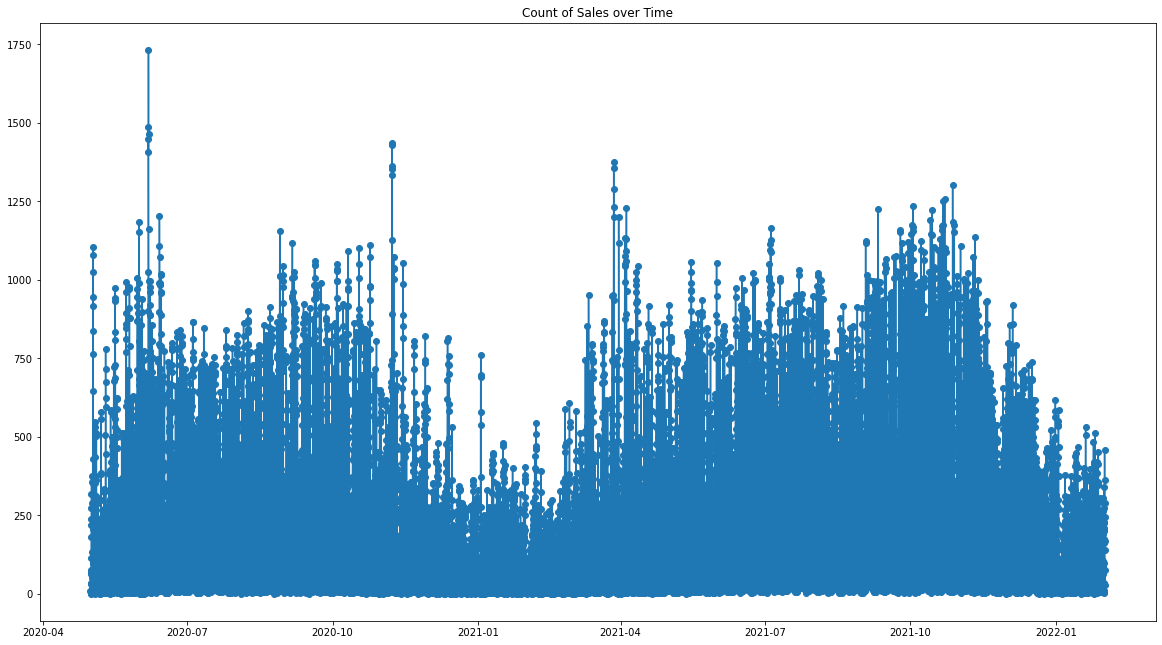

In [13]:
# Plot out the data by datetime
time_bike_df = bike_df.groupby(["started_at"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(time_bike_df.index, time_bike_df.values, linestyle="solid")
plt.title("Count of Sales over Time")
plt.show()

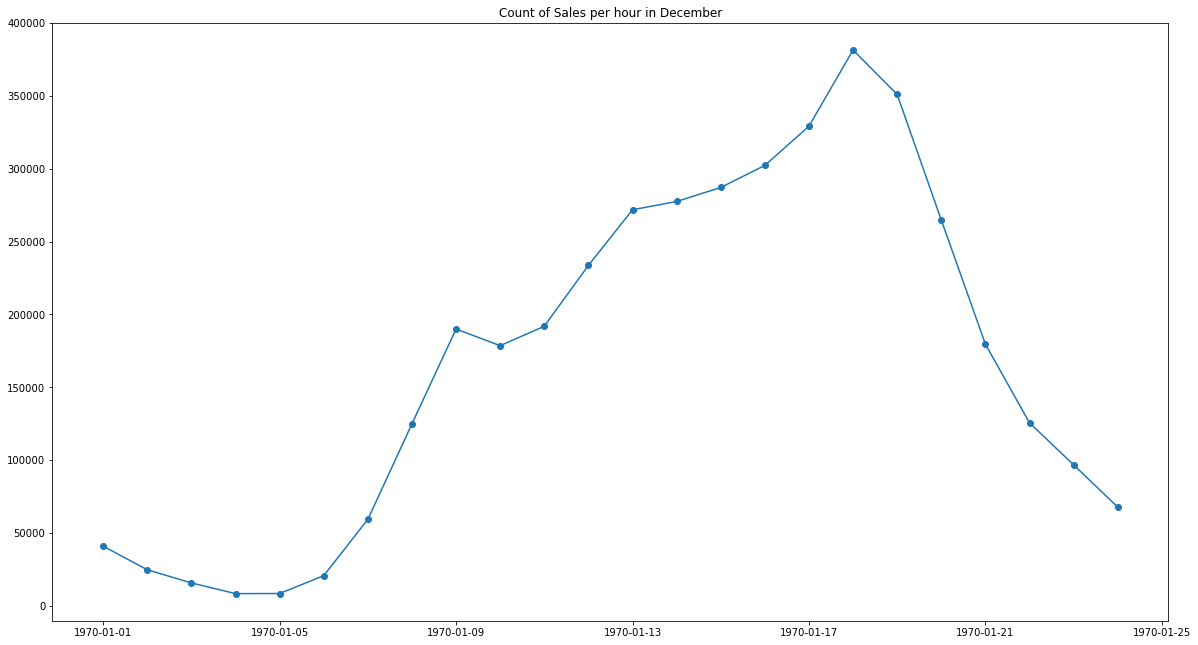

In [14]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_hour"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per hour in December")
plt.show()

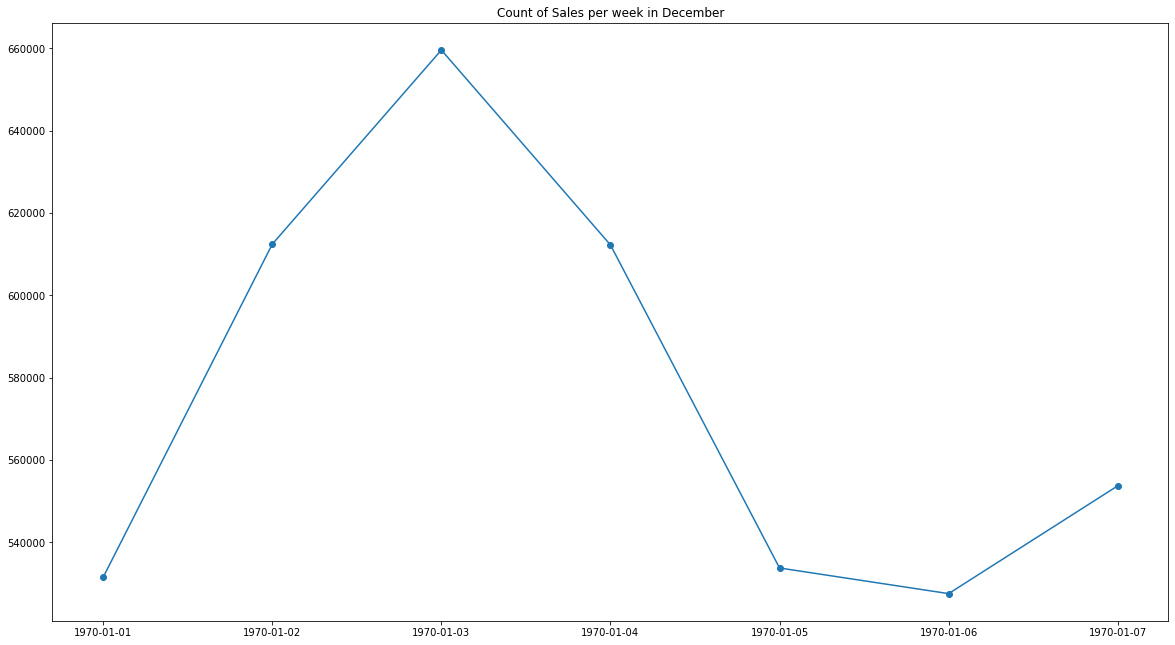

In [15]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_dow"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per week in December")
plt.show()

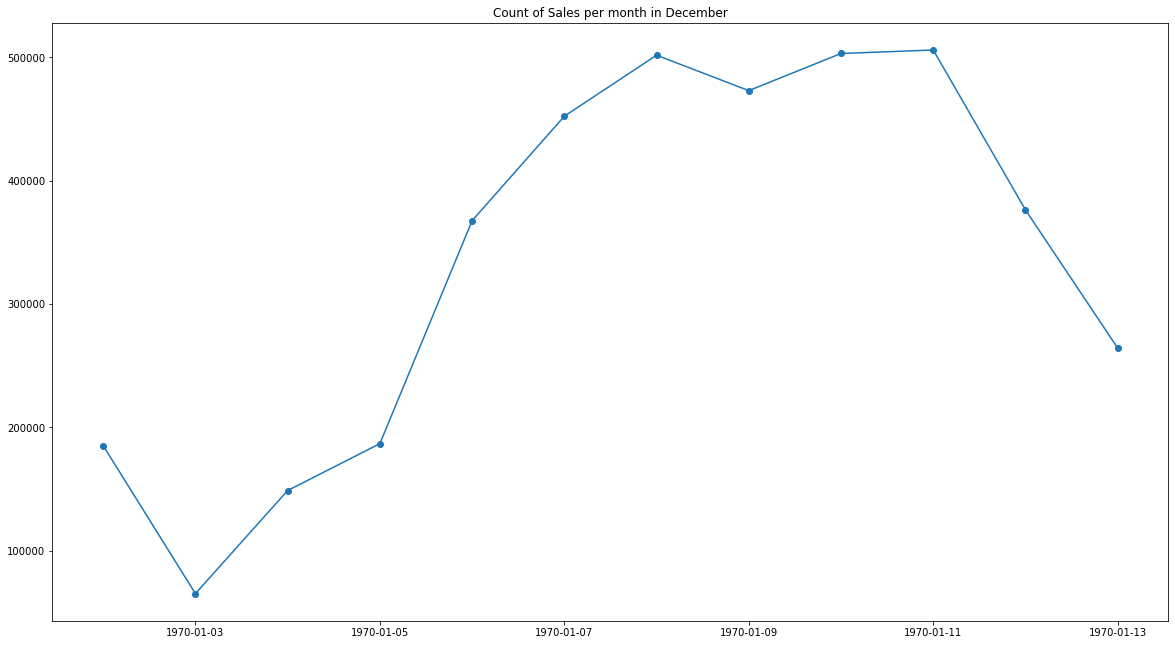

In [16]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_month"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per month in December")
plt.show()

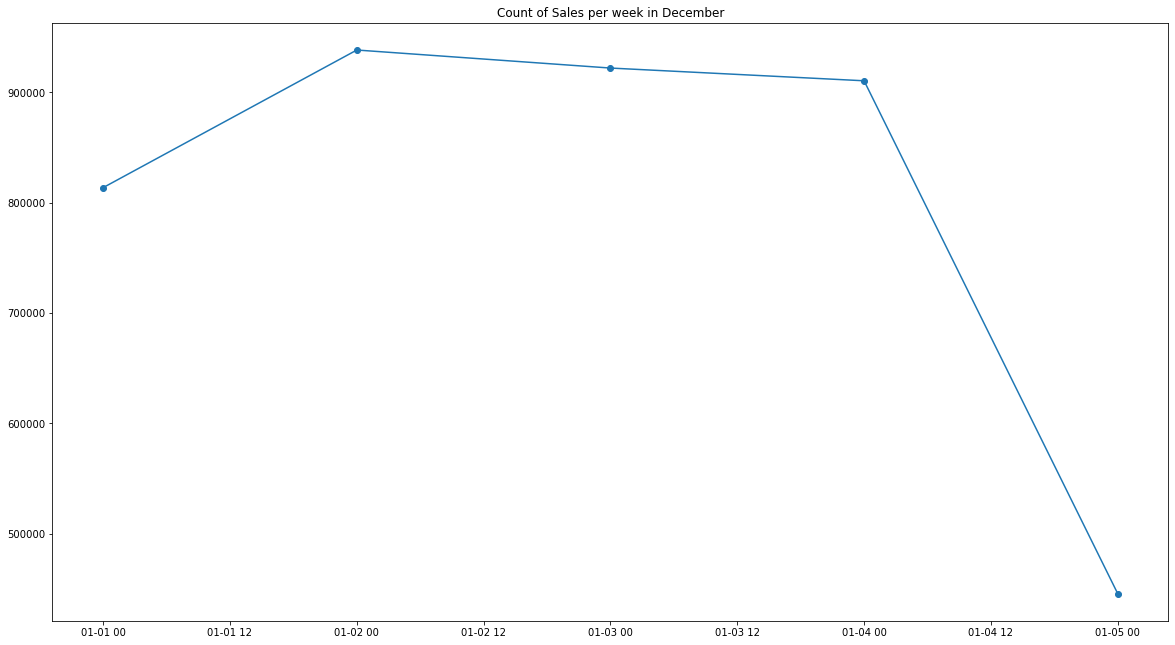

In [17]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_week"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per week in December")
plt.show()

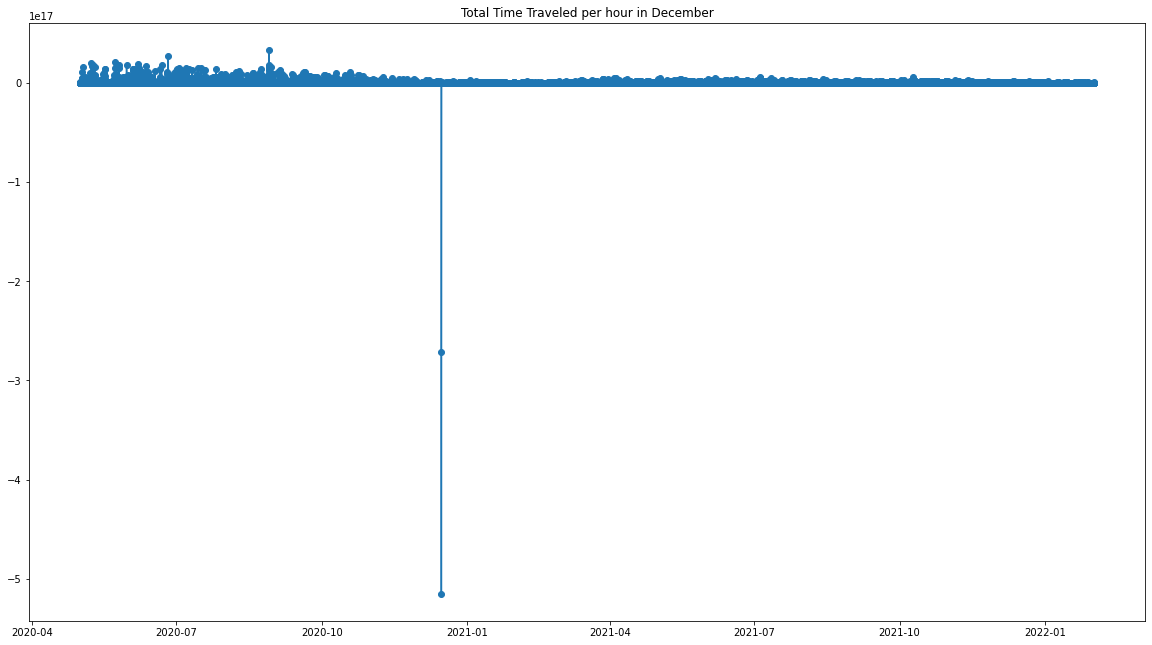

In [18]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at"])["elapsed_time"].sum()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

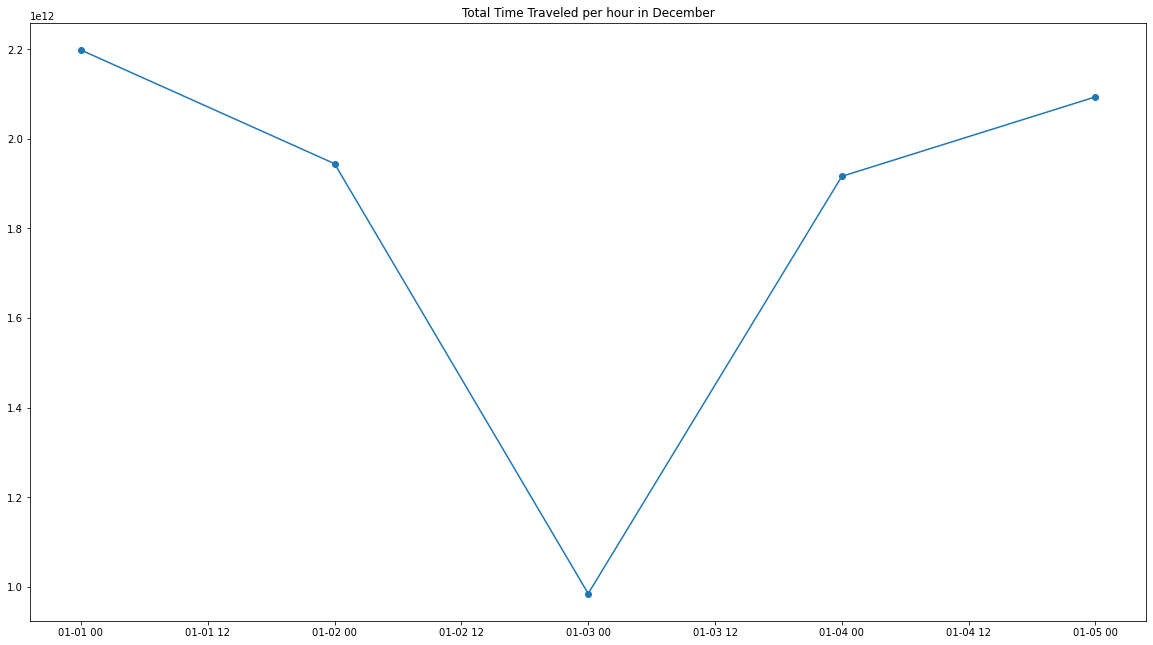

In [19]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].mean()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

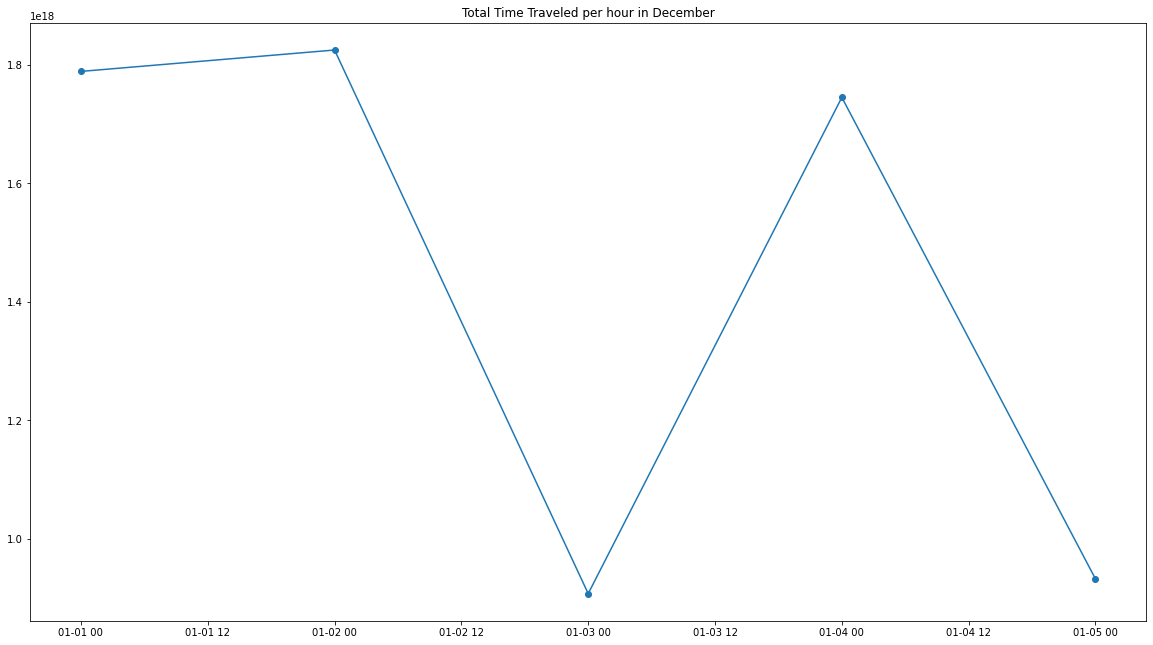

In [20]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].sum()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

In [21]:
# Bin off the latitude and longitude
location_list = ["start_lat", "start_lng", "end_lat", "end_lng"]
for perm in itertools.product([2, 5, 10],location_list):
        bike_df[f"{perm[1]}_{perm[0]}"] = bike_df[perm[1]].apply(lambda l: l - (l%perm[0]))
bike_df.drop(location_list, axis=1, inplace=True)
bike_df.head()

,Unnamed: 0,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,elapsed_time,started_at_year,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,0,docked_bike,2020-05-30 17:00:00,2020-05-31 18:00:00,Anacostia Library,31804.0,11th & H St NE,casual,1 days 00:59:53,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,1,docked_bike,2020-05-09 14:00:00,2020-05-09 15:00:00,10th & E St NW,31256.0,21st St & Constitution Ave NW,member,0 days 00:24:29,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,2,docked_bike,2020-05-24 17:00:00,2020-05-24 17:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,member,0 days 00:16:32,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,3,docked_bike,2020-05-27 15:00:00,2020-05-27 15:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,casual,0 days 00:17:21,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,4,docked_bike,2020-05-31 14:00:00,2020-05-31 14:00:00,Georgia Ave & Morton St NW,31419.0,17th & K St NW,casual,0 days 00:24:27,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [22]:
# Convert the objects to categorical types
bike_df[category_list] = bike_df[category_list].astype("category")
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030673 entries, 0 to 4463542
Data columns (total 33 columns):
 #   Column              Dtype          
---  ------              -----          
 0   Unnamed: 0          int64          
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  category       
 5   start_station_id    object         
 6   end_station_name    category       
 7   member_casual       category       
 8   elapsed_time        timedelta64[ns]
 9   started_at_year     category       
 10  started_at_month    category       
 11  started_at_day      category       
 12  started_at_hour     category       
 13  started_at_dow      category       
 14  started_at_week     category       
 15  ended_at_year       category       
 16  ended_at_month      category       
 17  ended_at_day        category       
 18  ended_at_hour       category       
 19  ended_at_dow        c

In [23]:
# Get the one hot encoded dummy parameters
#bike_df = pd.get_dummies(data=bike_df, columns=category_list, drop_first=True)
#bike_df.head()

In [24]:
# break out the elapsed time
bike_df["elapsed_time"] = bike_df["elapsed_time"].apply(lambda l: l.seconds/60)
bike_df.head()

,Unnamed: 0,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,elapsed_time,started_at_year,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,0,docked_bike,2020-05-30 17:00:00,2020-05-31 18:00:00,Anacostia Library,31804.0,11th & H St NE,casual,59.883333,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,1,docked_bike,2020-05-09 14:00:00,2020-05-09 15:00:00,10th & E St NW,31256.0,21st St & Constitution Ave NW,member,24.483333,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,2,docked_bike,2020-05-24 17:00:00,2020-05-24 17:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,member,16.533333,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,3,docked_bike,2020-05-27 15:00:00,2020-05-27 15:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,casual,17.350000,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,4,docked_bike,2020-05-31 14:00:00,2020-05-31 14:00:00,Georgia Ave & Morton St NW,31419.0,17th & K St NW,casual,24.450000,2020,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [25]:
# Group the data to get the labels
cat_list = ["start_station_name", "started_at_year", "started_at_month", "started_at_day", "started_at_hour"]
num_list = ["start_station_name"]

In [26]:
# Aggregate the data to get ready for predicting by the hour
hour_df = bike_df.groupby([f"started_at_{val}" for val in ["year", "month", "day", "hour"]]).count().reset_index()
hour_df = hour_df.reset_index()
hour_df

,index,started_at_year,started_at_month,started_at_day,started_at_hour,Unnamed: 0,rideable_type,started_at,ended_at,start_station_name,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,0,2020,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2020,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020,1,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2020,1,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26779,26779,2022,12,31,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26780,26780,2022,12,31,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26781,26781,2022,12,31,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26782,26782,2022,12,31,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


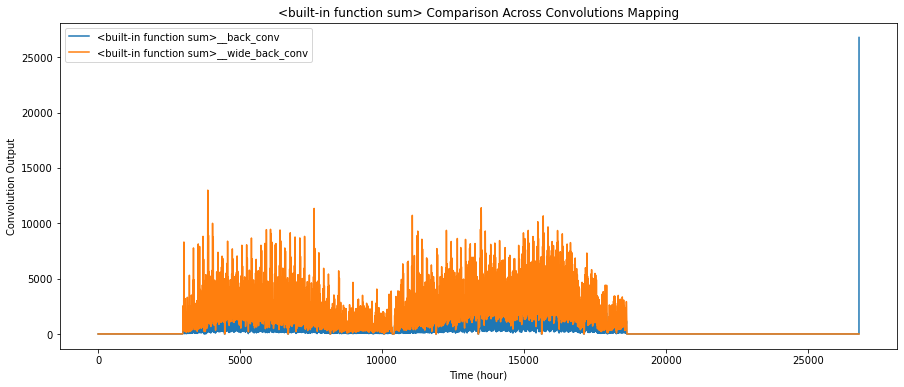

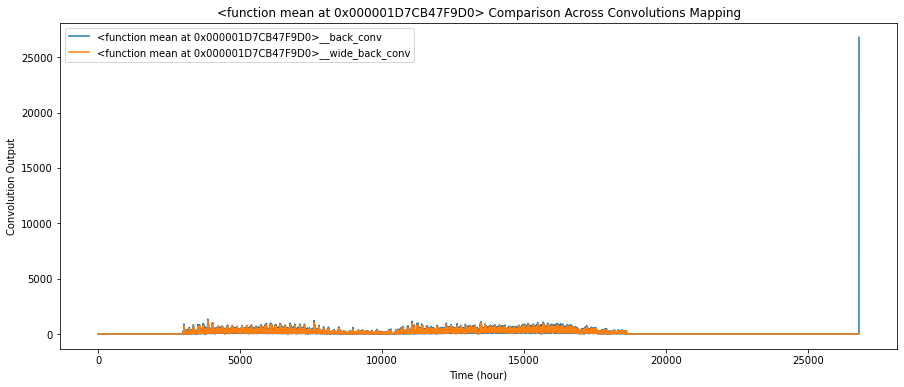

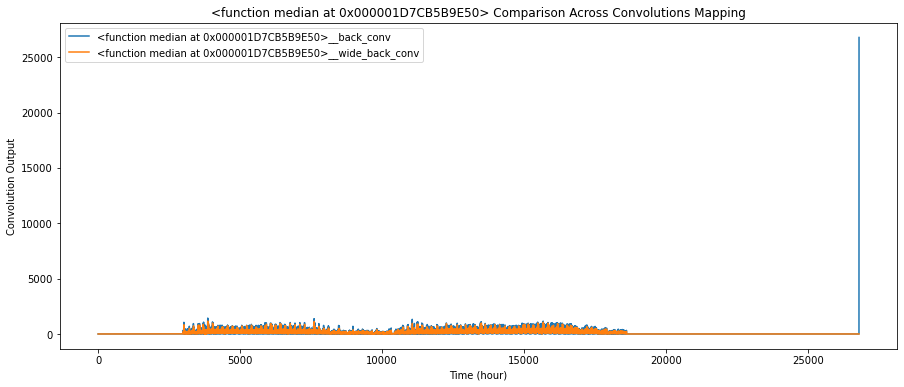

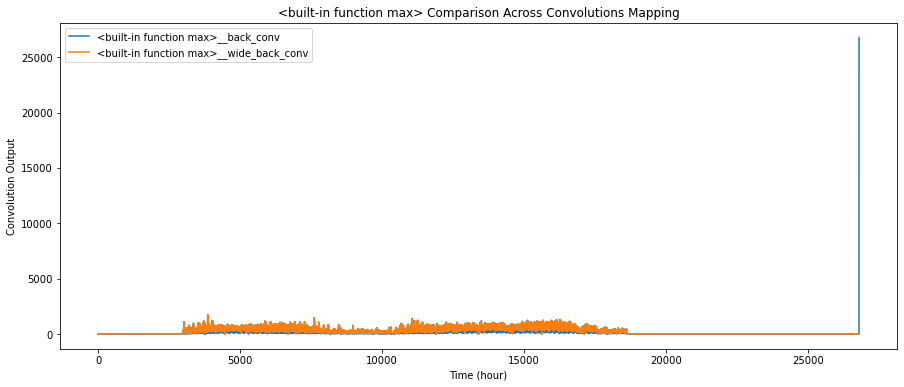

In [27]:
# Create a convolution for the elapsed time stuff
# Plot out the data by datetime
def create_convolution_list(input_data, conv_mapping, conv_mapping_function):
    min_conv = min(conv_mapping)
    max_conv = max(conv_mapping)
    output_list = [0 for x in range(-min_conv)]
    for item_index in range(-min_conv, len(input_data)-max_conv):
        output_list.append(conv_mapping_function([input_data[item_index+x] for x in conv_mapping]))
    [output_list.append(x) for x in range(len(input_data)-max_conv, len(input_data))]
    return output_list

# Run a combination of graphs
def run_convolutions(input_data, new_col_names, mapping_lists, function_list):
    for function in function_list:
        plt.figure(figsize=(15,6))
        for x in range(len(mapping_lists)):
            col_name = f"{str(function)}__{new_col_names[x]}"
            hour_df[col_name] = create_convolution_list(input_data, mapping_lists[x], function)
            plt.plot(hour_df[col_name], label=col_name)
        plt.title(f"{str(function)} Comparison Across Convolutions Mapping")
        plt.xlabel("Time (hour)")
        plt.ylabel("Convolution Output")
        plt.legend()
        plt.show()

# Run the convolutions on the data to add them to the dataset
back_conv_mapping = [-4, -3, -2, 2]
new_conv_mapping = [-2, -1, 0, 1, 2]
forward_conv_mapping = [-1, 1, 3, 5]
wide_conv_mapping = range(-5, 6)
wide_back_conv_mapping = range(-10, 1)
wide_front_conv_mapping = range(0, 11)

func_list = [sum, np.mean, np.median, max]
run_convolutions(hour_df["rideable_type"], ["back_conv", "wide_back_conv"], [back_conv_mapping, wide_back_conv_mapping], func_list)
#run_convolutions(hour_df["rideable_type"], ["back_conv", "central_conv", "forw_conv"], [back_conv_mapping, new_conv_mapping, forward_conv_mapping], func_list)
#run_convolutions(hour_df["rideable_type"], ["wide_central_conv", "wide_back_conv", "wide_front_conv"], [wide_conv_mapping, wide_back_conv_mapping, wide_front_conv_mapping], func_list)

In [28]:
bike_df.drop(["started_at", "ended_at"], axis=1, inplace=True)

In [29]:
# Start training some models and building pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(hour_df.columns)

cat_list = ["start_station_id", "started_at_year", "started_at_month", "started_at_day", "started_at_hour"]
param_num_list = [found_col for found_col in hour_df.columns if "conv" in found_col]
num_list = ["rideable_type"]

input_df = hour_df[cat_list + param_num_list + num_list].copy()
X = input_df[input_df.columns[~input_df.columns.isin(num_list)]]
print(X.columns)
y = input_df["rideable_type"]
# parameter pipelines to feed the main model
full_transformer=ColumnTransformer(transformers=[
    ("category", make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False)), cat_list),
    ("number", make_pipeline(StandardScaler()), param_num_list)
])

# Join parameter pipelines and the model pipeline
full_processor = make_pipeline(full_transformer, SGDRegressor(max_iter=1000, tol=1e-3))
col_processor = make_pipeline(full_transformer)
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Index(['index', 'started_at_year', 'started_at_month', 'started_at_day',
       'started_at_hour', 'Unnamed: 0', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'member_casual', 'elapsed_time', 'started_at_dow',
       'started_at_week', 'ended_at_year', 'ended_at_month', 'ended_at_day',
       'ended_at_hour', 'ended_at_dow', 'ended_at_week', 'start_lat_2',
       'start_lng_2', 'end_lat_2', 'end_lng_2', 'start_lat_5', 'start_lng_5',
       'end_lat_5', 'end_lng_5', 'start_lat_10', 'start_lng_10', 'end_lat_10',
       'end_lng_10', '<built-in function sum>__back_conv',
       '<built-in function sum>__wide_back_conv',
       '<function mean at 0x000001D7CB47F9D0>__back_conv',
       '<function mean at 0x000001D7CB47F9D0>__wide_back_conv',
       '<function median at 0x000001D7CB5B9E50>__back_conv',
       '<function median at 0x000001D7CB5B9E50>__wide_back_conv',
       '<built-in function max>__back_conv',
       

In [30]:
# utilize the pipelines to try to make predictions
full_processor.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['start_station_id',
                                                   'started_at_year',
                                                   'started_at_month',
                                                   'started_at_day',
                                                   'started_at_hour']),
                                                 ('number',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                         

In [31]:
# Try to predict
y_pred_val = pd.Series(full_processor.predict(x_val))
y_val = y_val.astype("float64").reset_index().drop(["index"], axis=1).iloc[:,0]
y_val

0        47.0
1         0.0
2        53.0
3         0.0
4         0.0
        ...  
4281    849.0
4282      0.0
4283      8.0
4284      0.0
4285      0.0
Name: rideable_type, Length: 4286, dtype: float64

In [32]:
# calculate the error in the pipeline
error = y_pred_val.subtract(y_val, fill_value=0.0)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"RMSE: {rmse} \nMAE: {mae} \nR2: {r2}")

RMSE: 356646.6955121038 
MAE: 230402.5289892164 
R2: -2534005.976653906


In [33]:
# Error
error

0      -2.761977e+05
1      -2.150942e+04
2      -2.226774e+05
3      -2.203834e+04
4      -3.257686e+04
            ...     
4281    1.097925e+06
4282   -9.967831e+04
4283   -6.811174e+05
4284   -6.829289e+04
4285   -2.420632e+04
Length: 4286, dtype: float64

In [34]:
# Try out the RandomizedSearch, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
# Use the RandomizedSearch on the SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)

# add the pipeline right here


In [36]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_iter":ss.uniform(1000, 5000),
    "tol":loguniform(1e-5, 1e0),
    "learning_rate":["adaptive", "optimal"],
    "shuffle":[True]
}

In [37]:
# Set up the RandomizedSearchCV first
n_iter_search = 100
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

In [38]:
# Run the randomized search
col_pipeline = make_pipeline(full_transformer, random_search)
col_pipeline.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Quoted from sklearn's website
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")
report(random_search.cv_results_)

In [ ]:
random_search.best_params_

In [ ]:
# Now run the model results for the Random Search CV
random_best_pipeline = make_pipeline(full_transformer, SGDRegressor(learning_rate=random_search.best_params_["learning_rate"], max_iter=random_search.best_params_["max_iter"], shuffle=True, tol=random_search.best_params_["tol"]))
random_best_pipeline.fit(x_train, y_train)
y_random_preds = random_best_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_random_preds))

In [ ]:
# Plot out the Random Search CV Predictions
# Plot out the predictions for further analysis
plt.scatter(y_val, y_random_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search SGDRegressor True vs. Predicted Rental Rate")
plt.show()

In [ ]:
# Now try to turn to grid search

# Redefine the param grid
param_grid = {
    "max_iter":np.linspace(100, 1000, num=50),
    "tol":np.power(10, np.arange(-5, 3, dtype=float)),
    "learning_rate":["adaptive", "invscaling"],
    "shuffle":[True],
    "eta0":[0.001, 0.01]
}

# Next then run the search iteration
grid_search = GridSearchCV(
    clf, param_grid=param_grid
)

grid_pipeline = make_pipeline(full_transformer, grid_search)

grid_pipeline.fit(x_train, y_train)

In [ ]:
# Now print out the report statistics
report(grid_search.cv_results_, 10)

In [ ]:
grid_search.best_params_

In [ ]:
# Validate the RMSE of the GridSearchCV
clf = SGDRegressor(eta0=grid_search.best_params_['eta0'],warm_start=True, learning_rate=grid_search.best_params_['learning_rate'], max_iter=grid_search.best_params_['max_iter'], shuffle=True, tol=grid_search.best_params_['tol'])
new_grid_pipeline = make_pipeline(full_transformer, clf)
new_grid_pipeline.fit(x_train, y_train)
y_grid_preds = new_grid_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_preds))

In [ ]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Grid Search SGDRegressor True vs. Predicted Rental Rate")
plt.show()